# Chapter 5: Hash tables

- You learn about hash tables, one of the most useful basic data structures. Hash tables have many uses; this chapter covers the common use cases.
- You learn about the internals of hash tables: implementation, collisions, and hash functions. This will help you understand how to analyze a hash table’s performance.

> Note: **From now on, only important theory and code can be found in the notebooks**. If you need in depth view, consult the accompanying book.

## Hash functions

A hash function is a function where you put in a string1 and you get back a number.

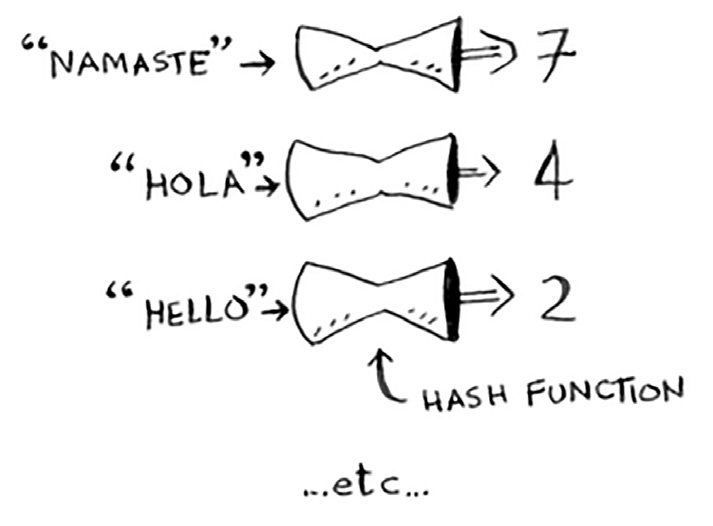

In technical terminology, we’d say that a hash function “maps strings to numbers.” You might think there’s no discernable pattern to what number you get out when you put a string in. But there are some requirements for a hash function:
- It needs to be consistent. For example, suppose you put in “apple” and get back “4”. Every time you put in “apple”, you should get “4” back. Without this, your hash table won’t work.
- It should map different words to different numbers. For example, a hash function is no good if it always returns “1” for any word you put in. In the best case, every different word should map to a different number.

### Exercises

It’s important for hash functions to consistently return the same output for the same input. If they don’t, you won’t be able to find your item after you put it in the hash table!

Which of these hash functions are consistent?

#### 5.1 f(x) = 1    <---- Returns "1" for all input

**Answer**
Consistent

#### 5.2 f(x) = rand()    <---- Returns a random number every time

**Answer**
Not consistent

#### 5.3 f(x) = next_empty_slot()    <---- Returns the index of the next empty slot in the hash table

**Answer**
Not consistent

#### 5.4 f(x) = len(x)    <---- Uses the length of the string as the index

**Answer**
Consistent

## Use cases

Hash tables are used everywhere. This section will show you a few use cases.

### Using hash tables for lookups

Hash tables are
great when you want to
• Create a mapping from one thing to another thing
• Look something up

#### Examples

1. phone book
1. DNS resolution

### Preventing duplicate entries

#### Examples
1. Duplicate vote check

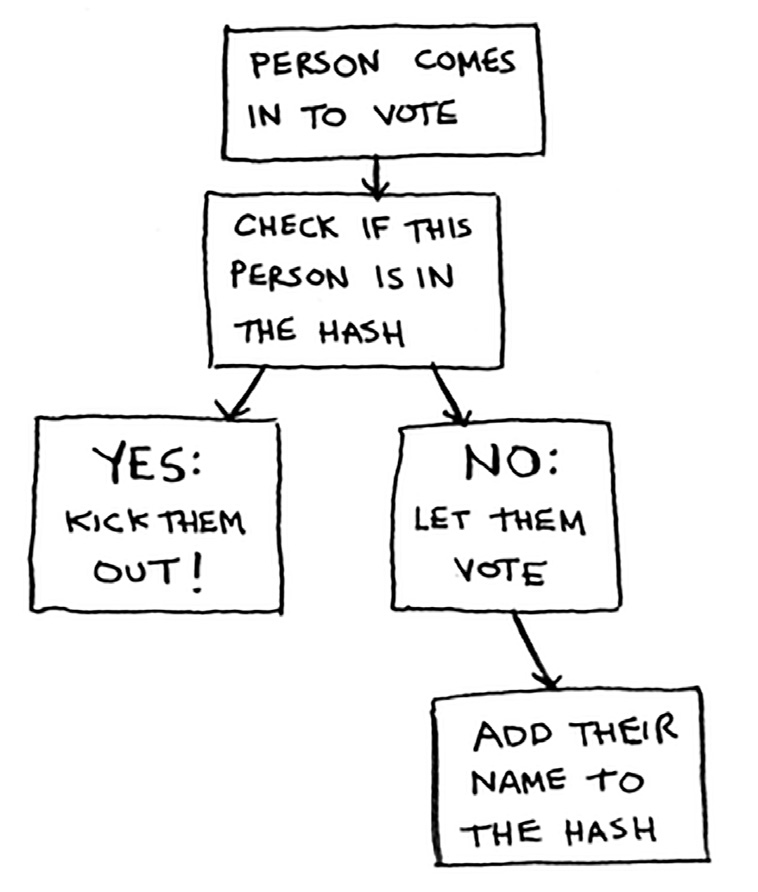

Here's the code

In [15]:
voted = {}

In [16]:
def check_voter(name):
    if voted.get(name):
        print("Kick them out!")
    else:
        voted[name] = True
        print("Let them vote!")

In [17]:
check_voter('junaid')

Let them vote!


In [18]:
check_voter('junaid')

Kick them out!


In [19]:
check_voter('tom')

Let them vote!


In [20]:
check_voter('tom')

Kick them out!


### Using hash tables as a cache

#### Caching Webpage

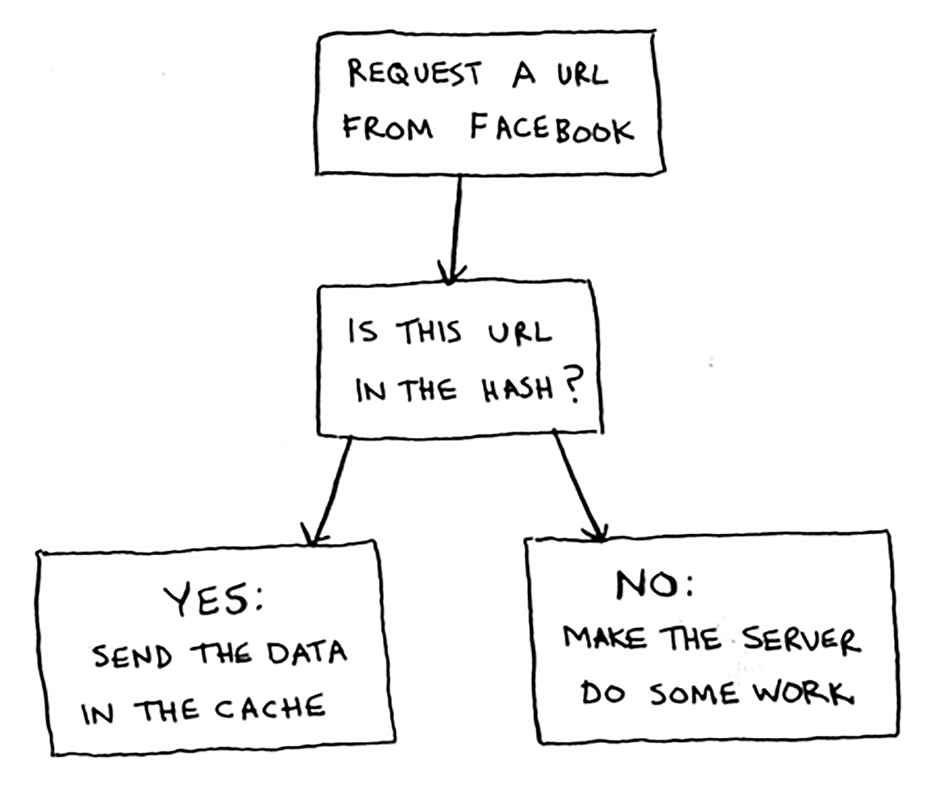

Here it is in code

In [30]:
import requests
cache = {}

In [31]:
def get_page(url):
    if cache.get(url):
        print("Data from Cache")
        return cache[url]
    else:
        print("Data from Web")
        data = requests.get(url)
        cache[url] = data
        return data

In [32]:
print(get_page("https://www.google.com"))

Data from Web
<Response [200]>


In [33]:
print(get_page("https://www.facebook.com"))

Data from Web
<Response [200]>


In [34]:
print(get_page("https://www.facebook.com"))

Data from Cache
<Response [200]>


In [35]:
print(get_page("https://www.google.com"))

Data from Cache
<Response [200]>


### Recap

To recap, hashes are good for
- Modeling relationships from one thing to another thing
- Filtering out duplicates
- Caching/memorizing data instead of making your server do work

## Collisions

Two keys have been assigned the same slot. This is a problem. If you store the price of avocados at that slot, you’ll overwrite the price of apples. Then the next time someone asks for the price of apples, they will get the price of avocados instead! 

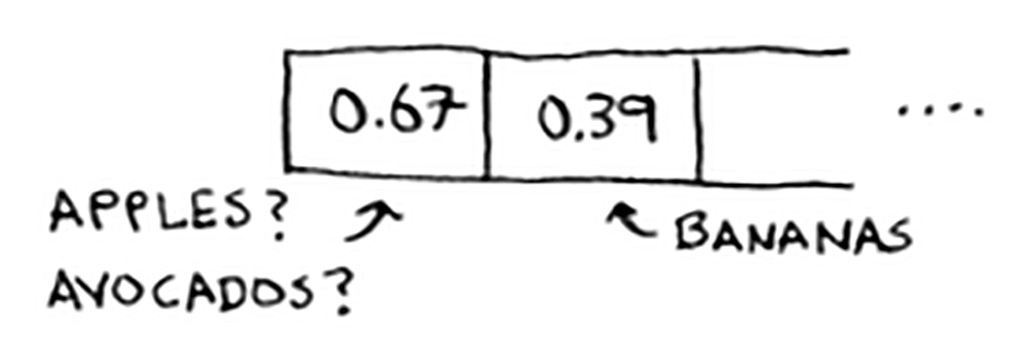

Collisions are bad, and you need to work around them. There are many different ways to deal with collisions. The simplest one is this: if multiple keys map to the same slot, start a linked list at that slot.

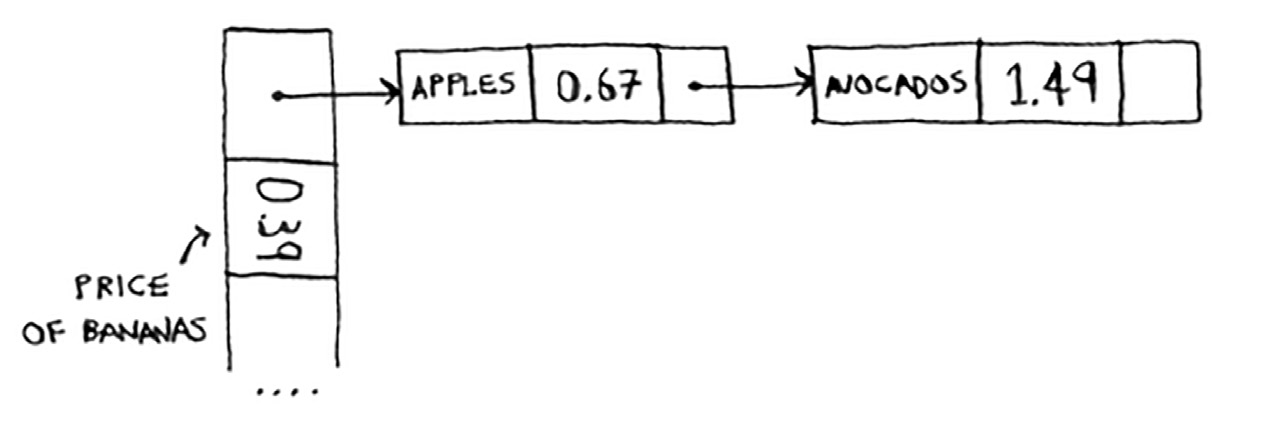

There are two lessons here:
- Your hash function is really important. Your hash function mapped all the keys to a single slot. Ideally, your hash function would map keys evenly all over the hash.
- If those linked lists get long, it slows down your hash table a lot. But they won’t get long if you use a good hash function!

Hash functions are important. A good hash function will give you very
few collisions. So how do you pick a good hash function? That’s coming
up in the next section!

## Performance

In the average case, hash tables are really fast. In the worst case, a hash table takes O(n)—linear time—for everything, which is really slow. Let’s compare hash tables to arrays and lists.

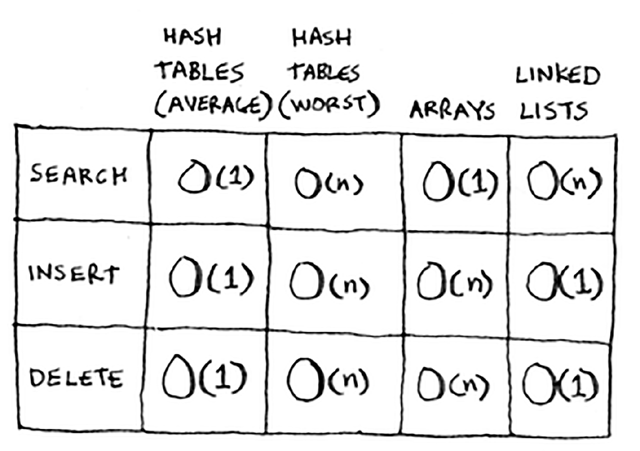

Look at the average case for hash tables. Hash tables are as fast as arrays at searching (getting a value at an index). And they’re as fast as linked lists at inserts and deletes. It’s the best of both worlds! But in the worst case, hash tables are slow at all of those. So it’s important that you don’t
hit worst-case performance with hash tables. And to do that, you need to avoid collisions. To avoid collisions, you need
- A low load factor
- A good hash function

### Load factor

The load factor of a hash table is easy to calculate.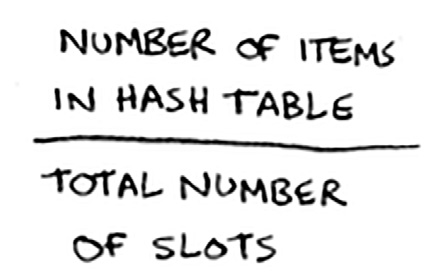

Having a load factor greater than 1 means you have more items than slots in your array.

Once the load factor starts to grow, you need to add more slots to your hash table. This is called  resizing. For example, suppose you have this hash table that is getting pretty full.

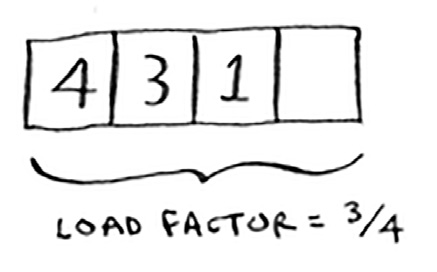

You need to resize this hash table. First you create a new array that’s bigger. The rule of thumb is to make an array that is twice the size.

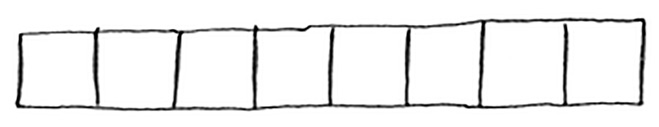

Now you need to re-insert all of those items into this new hash table using the hash function:

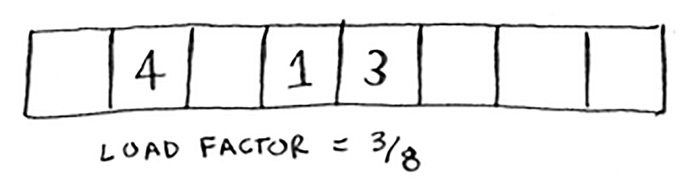

This new table has a load factor of 3/8. Much better! With a lower load factor, you’ll have fewer collisions, and your table will perform better. A good rule of thumb is, resize when your load factor is greater than 0.7.

You might be thinking, “This resizing business takes a lot of time!” And you’re right. Resizing is expensive, and you don’t want to resize too often. But averaged out, hash tables take O(1) even with resizing.

### A good hash function

A good hash function distributes values in the array evenly.

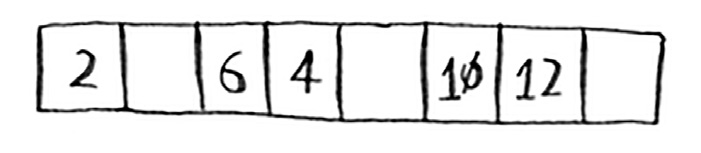

A bad hash function groups values together and produces a lot of collisions.

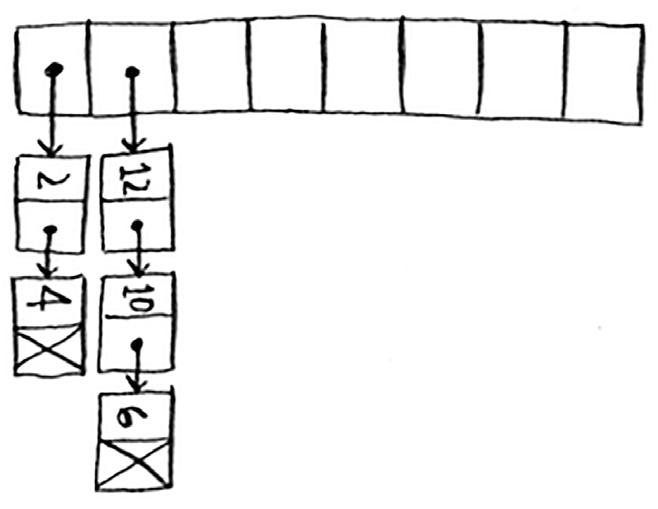

### Exercises 

It’s important for hash functions to have a good distribution. They should map items as broadly as possible. The worst case is a hash function that maps all items to the same slot in the hash table.

Suppose you have these four hash functions that work with strings:

A. Return “1” for all input.

B. Use the length of the string as the index.

C. Use the first character of the string as the index. So, all strings starting with a are hashed together, and so on.

D. Map every letter to a prime number: a = 2, b = 3, c = 5, d = 7, e = 11, and so on. For a string, the hash function is the sum of all the characters modulo the size of the hash. For example, if your hash size is 10, and the string is “bag”, the index is 3 + 2 + 17 % 10 = 22 % 10 = 2.

For each of these examples, which hash functions would provide a good distribution? Assume a hash table size of 10 slots.

#### 5.5 A phonebook where the keys are names and values are phone numbers. The names are as follows: Esther, Ben, Bob, and Dan.

**Answer**
Hash functions C and D would give a good distribution.

#### 5.5 A mapping from battery size to power. The sizes are A, AA, AAA, and AAAA.

**Answer**
Hash functions B and D would give a good distribution.

#### 5.6 A mapping from book titles to authors. The titles are Maus, Fun Home, and Watchmen.

**Answer**
Hash functions B, C, and D would give a good distribution.

## Recap

You’ll almost never have to implement a hash table yourself. The programming language you use should provide an implementation for you. You can use Python’s hash tables and assume that you’ll get the
average case performance: constant time.

Hash tables are a powerful data structure because they’re so fast and they let you model data in a different way. You might soon find that you’re using them all the time:

- You can make a hash table by combining a hash function with an array.
- Collisions are bad. You need a hash function that minimizes collisions.
- Hash tables have really fast search, insert, and delete.
- Hash tables are good for modeling relationships from one item to another item.
- Once your load factor is greater than .07, it’s time to resize your hash table.
- Hash tables are used for caching data (for example, with a web server).
- Hash tables are great for catching duplicates.